<a href="https://colab.research.google.com/github/JuniaBS/Bootcamp-Data-Analytics./blob/main/Desafio_Final_Reclama%C3%A7%C3%B5es_do_Consumidor_SQUAD_MARY_JACKSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Final Reclamações do Consumidor


Suponha que você trabalha na área de dados do Procon. Diariamente, você e sua equipe recebem dados de diversas reclamações dos consumidores. Cada reclamação, então, tem um determinado tempo para ser resolvida entre o cliente e a companhia em questão.

Dado esse contexto, a sua equipe recebeu do time de operações dados históricos de reclamações de 2017 a 2021 na pasta reclamações-consumidor. Os dados são uma amostra dos dados extraídos do kaggle oriundos do Procon de 2017 a 2021.


De posse dessas informações, a sua equipe ficou encarregada de responder às seguintes perguntas do time de negócios:




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url_2017 = "https://raw.githubusercontent.com/dsreliete/Womakerscode-DA-desafio_squad/refs/heads/main/reclamacoes-fundamentadas-sindec-2017.csv"
url_2018 = "https://raw.githubusercontent.com/dsreliete/Womakerscode-DA-desafio_squad/refs/heads/main/reclamacoes-fundamentadas-sindec-2018.csv"
url_2019 = "https://raw.githubusercontent.com/dsreliete/Womakerscode-DA-desafio_squad/refs/heads/main/reclamacoes-fundamentadas-sindec-2019.csv"
url_2020 = "https://raw.githubusercontent.com/dsreliete/Womakerscode-DA-desafio_squad/refs/heads/main/reclamacoes-fundamentadas-sindec-2020.csv"
url_2021 = "https://raw.githubusercontent.com/dsreliete/Womakerscode-DA-desafio_squad/refs/heads/main/reclamacoes-fundamentadas-sindec-2021.csv"

reclamacoes2017 = pd.read_csv(url_2017, sep=';', on_bad_lines='warn')
reclamacoes2018 = pd.read_csv(url_2018, sep=';', on_bad_lines='warn')
reclamacoes2019 = pd.read_csv(url_2019, sep=';', on_bad_lines='warn')
reclamacoes2020 = pd.read_csv(url_2020, sep=';', on_bad_lines='warn')
reclamacoes2021 = pd.read_csv(url_2021, sep=';', on_bad_lines='warn')

<ipython-input-74-3cdfa4a4267b>:8: ParserWarning: Skipping line 3216: expected 23 fields, saw 24
Skipping line 3238: expected 23 fields, saw 24
Skipping line 12315: expected 23 fields, saw 25
Skipping line 12407: expected 23 fields, saw 24
Skipping line 17441: expected 23 fields, saw 24
Skipping line 18208: expected 23 fields, saw 24
Skipping line 19617: expected 23 fields, saw 24
Skipping line 23141: expected 23 fields, saw 24
Skipping line 23641: expected 23 fields, saw 24
Skipping line 23642: expected 23 fields, saw 25
Skipping line 27136: expected 23 fields, saw 24
Skipping line 27661: expected 23 fields, saw 24
Skipping line 28109: expected 23 fields, saw 24

  reclamacoes2018 = pd.read_csv(url_2018, sep=';', on_bad_lines='warn')
<ipython-input-74-3cdfa4a4267b>:9: ParserWarning: Skipping line 117: expected 23 fields, saw 25
Skipping line 1205: expected 23 fields, saw 25
Skipping line 1285: expected 23 fields, saw 24
Skipping line 3596: expected 23 fields, saw 25
Skipping line 4134

In [ ]:
reclamacoes2017.head()

,2017,2017-10-05 09:48:39.000,2017-07-27 14:43:37.000,03,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,1,60701190000104,...,6422100,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",S,76,Outros Contratos,1112,"Contrato (não cumprimento, alteração, transferencia, irregularidade, rescisão, etc.)",F,entre 31 a 40 anos,5057030
0,2017,2017-12-12 12:35:53.000,2017-07-31 16:03:45.000,3,Sudeste,SP,CLARO S/A,NET,1,4.043254e+13,...,NaN,NaN,S,186,Telefonia Fixa ( Plano de Expansão / Compra e ...,3844.0,Contrato - Rescisão/alteração unilateral,M,mais de 70 anos,4444000.0
1,2017,2017-12-12 12:40:07.000,2017-08-04 10:55:48.000,3,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,1,6.169523e+13,...,3514000.0,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,N,185,Energia Elétrica,6030.0,PID - Pedido de Indenização por Danos Morais,F,entre 31 a 40 anos,4674110.0
2,2017,2017-10-26 14:07:56.000,2017-07-19 14:48:25.000,3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,1,7.155738e+12,...,5223100.0,ESTACIONAMENTO DE VEÍCULOS,N,262,"Estacionamento ( Particular, Supermercado, Sho...",4946.0,"Vicio de qualidade (mal executado, inadequado,...",M,entre 31 a 40 anos,2376040.0
3,2017,2017-12-04 09:51:45.000,2017-07-21 11:00:06.000,3,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,1,4.043254e+13,...,6120501.0,TELEFONIA MÓVEL CELULAR,S,186,Telefonia Fixa ( Plano de Expansão / Compra e ...,3624.0,"Vicio de qualidade (mal executado, inadequado,...",M,entre 41 a 50 anos,2072002.0
4,2017,2017-10-26 14:09:00.000,2017-07-21 10:36:50.000,3,Sudeste,SP,AEROVIAS DEL CONTINENTE AMERICANO S/A,AVIANCA INTERNACIONAL,1,3.371284e+13,...,5111100.0,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,S,276,Agências e Operadoras de viagens (pacotes turí...,5317.0,Desistência do serviço (artigo 49 - descumprim...,M,entre 21 a 30 anos,4368003.0


In [ ]:
reclamacoes2017.columns

Index(['2017', '2017-10-05 09:48:39.000', '2017-07-27 14:43:37.000', '03',
       'Sudeste', 'SP', 'ITAÚ UNIBANCO S/A', 'BANCO ITAÚ/BANCO UNIBANCO', '1',
       '60701190000104', '60701190', 'ITAU UNIBANCO S.A.', 'EST UNIF',
       '6422100', 'BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL', 'S', '76',
       'Outros Contratos', '1112',
       'Contrato (não cumprimento, alteração, transferencia, irregularidade, rescisão, etc.)',
       'F', 'entre 31 a 40 anos', '5057030'],
      dtype='object')

In [ ]:
reclamacoes2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42306 entries, 0 to 42305
Data columns (total 23 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   2017                                                                                  42306 non-null  int64  
 1   2017-10-05 09:48:39.000                                                               42300 non-null  object 
 2   2017-07-27 14:43:37.000                                                               42300 non-null  object 
 3   03                                                                                    42306 non-null  int64  
 4   Sudeste                                                                               42306 non-null  object 
 5   SP                                                                               

In [ ]:
# como df reclamacoes2017 está sem titulos nas colunas criou-se un novo df com os titulos None
novareclamacoes2017 = pd.read_csv(url_2017, sep=';', on_bad_lines='warn', header=None)
novareclamacoes2017.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2017,2017-10-05 09:48:39.000,2017-07-27 14:43:37.000,3,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,1,6.070119e+13,...,6422100.0,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",S,76,Outros Contratos,1112.0,"Contrato (não cumprimento, alteração, transfer...",F,entre 31 a 40 anos,5057030.0
1,2017,2017-12-12 12:35:53.000,2017-07-31 16:03:45.000,3,Sudeste,SP,CLARO S/A,NET,1,4.043254e+13,...,NaN,NaN,S,186,Telefonia Fixa ( Plano de Expansão / Compra e ...,3844.0,Contrato - Rescisão/alteração unilateral,M,mais de 70 anos,4444000.0
2,2017,2017-12-12 12:40:07.000,2017-08-04 10:55:48.000,3,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,1,6.169523e+13,...,3514000.0,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,N,185,Energia Elétrica,6030.0,PID - Pedido de Indenização por Danos Morais,F,entre 31 a 40 anos,4674110.0
3,2017,2017-10-26 14:07:56.000,2017-07-19 14:48:25.000,3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,1,7.155738e+12,...,5223100.0,ESTACIONAMENTO DE VEÍCULOS,N,262,"Estacionamento ( Particular, Supermercado, Sho...",4946.0,"Vicio de qualidade (mal executado, inadequado,...",M,entre 31 a 40 anos,2376040.0
4,2017,2017-12-04 09:51:45.000,2017-07-21 11:00:06.000,3,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,1,4.043254e+13,...,6120501.0,TELEFONIA MÓVEL CELULAR,S,186,Telefonia Fixa ( Plano de Expansão / Compra e ...,3624.0,"Vicio de qualidade (mal executado, inadequado,...",M,entre 41 a 50 anos,2072002.0


In [ ]:
reclamacoes2018.head()

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2018,2018-06-20 09:45:37.000,2018-02-19 09:25:45.000,2,Nordeste,MA,MOTOTEC SERVIÇOS LTDA - ME,MOTOTEC,1,8.852225e+12,...,4752100.0,COMÉRCIO VAREJISTA ESPECIALIZADO DE EQUIPAMENT...,S,101,"Telefone ( Convencional, Celular, Interfone, E...",NaN,NaN,F,entre 41 a 50 anos,65631110.0
1,2018,2018-06-20 09:45:37.000,2018-02-19 09:25:45.000,2,Nordeste,MA,MAGAZINE LILIANI S/A,LILIANI,1,1.159030e+13,...,4754701.0,COMÉRCIO VAREJISTA DE MÓVEIS,S,101,"Telefone ( Convencional, Celular, Interfone, E...",NaN,NaN,F,entre 41 a 50 anos,65631110.0
2,2018,2018-06-20 09:45:37.000,2018-02-19 09:25:45.000,2,Nordeste,MA,SAMSUNG ELETRÔNICA DA AMAZONIA LTDA,SAMSUNG,1,2.802730e+11,...,2632900.0,FABRICAÇÃO DE APARELHOS TELEFÔNICOS E DE OUTRO...,S,101,"Telefone ( Convencional, Celular, Interfone, E...",NaN,NaN,F,entre 41 a 50 anos,65631110.0
3,2018,2018-08-29 08:47:27.000,2018-05-09 10:58:10.000,2,Nordeste,MA,TECNO INDUSTRIA E COMERCIO DE COMPUTADORES LTDA,IBYTE,1,7.272825e+12,...,4753900.0,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,S,76,Outros Contratos,NaN,NaN,F,entre 31 a 40 anos,65630020.0
4,2018,2018-08-29 08:47:27.000,2018-05-09 10:58:10.000,2,Nordeste,MA,SUPERTECH INFORMATICA - JC & CIA LTDA - ME,SUPERTECH INFORMATICA,1,9.632201e+12,...,4751201.0,NaN,S,76,Outros Contratos,NaN,NaN,F,entre 31 a 40 anos,65630020.0


In [ ]:
reclamacoes2018.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [ ]:
reclamacoes2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39047 entries, 0 to 39046
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AnoCalendario          39047 non-null  int64  
 1   DataArquivamento       39033 non-null  object 
 2   DataAbertura           39046 non-null  object 
 3   CodigoRegiao           39047 non-null  int64  
 4   Regiao                 39047 non-null  object 
 5   UF                     39047 non-null  object 
 6   strRazaoSocial         39045 non-null  object 
 7   strNomeFantasia        32229 non-null  object 
 8   Tipo                   39047 non-null  int64  
 9   NumeroCNPJ             37729 non-null  float64
 10  RadicalCNPJ            37609 non-null  float64
 11  RazaoSocialRFB         34777 non-null  object 
 12  NomeFantasiaRFB        15650 non-null  object 
 13  CNAEPrincipal          34777 non-null  float64
 14  DescCNAEPrincipal      34589 non-null  object 
 15  At

In [ ]:
colunasreclamacoes18 = reclamacoes2018.columns
colunasreclamacoes18

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [ ]:
reclamacoes2019.head()

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2019,2019-10-04 11:12:54.000,2019-09-02 09:27:15.000,1,Norte,RO,CLARO S.A.,CIP ELETRONICA,1,4.043254e+13,...,6120501.0,TELEFONIA MÓVEL CELULAR,N,187.0,Telefonia Celular,NaN,NaN,M,entre 51 a 60 anos,76824042.0
1,2019,2019-01-08 10:56:05.000,2018-12-04 15:19:18.000,1,Norte,RO,BANCO DO BRASIL SA,BANCO DO BRASIL,1,1.910000e+02,...,6422100.0,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",N,53.0,Banco comercial,NaN,NaN,F,entre 41 a 50 anos,NaN
2,2019,2019-08-15 15:14:14.000,2019-07-16 17:00:46.000,1,Norte,RO,CENTRAIS ELETRICAS DE RONDONIA S/A,ENERGISA,1,5.914650e+12,...,3514000.0,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,N,185.0,Energia Elétrica,NaN,NaN,M,entre 41 a 50 anos,76824322.0
3,2019,2019-01-04 11:31:47.000,2018-04-19 10:09:02.000,1,Norte,RO,NOVA PROFISSIONAL CURSOS PROFISSIONALIZANTES TREI,SEBRAP,1,1.311034e+13,...,8599604.0,TREINAMENTO EM DESENVOLVIMENTO PROFISSIONAL E ...,S,236.0,Cursos Livres Outros,NaN,NaN,M,entre 31 a 40 anos,78932000.0
4,2019,2019-01-04 10:26:36.000,2018-08-30 09:46:37.000,1,Norte,RO,OI MOVEL S.A CIP ELETRONICA,ANTIGA 14 BRASIL TELECOM CELULAR S/A- TNL PCS S/A,1,5.423963e+12,...,6120501.0,TELEFONIA MÓVEL CELULAR,S,187.0,Telefonia Celular,NaN,NaN,M,entre 51 a 60 anos,78932000.0


In [ ]:
reclamacoes2019.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [ ]:
reclamacoes2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17555 entries, 0 to 17554
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AnoCalendario          17555 non-null  int64  
 1   DataArquivamento       17552 non-null  object 
 2   DataAbertura           17552 non-null  object 
 3   CodigoRegiao           17555 non-null  int64  
 4   Regiao                 17555 non-null  object 
 5   UF                     17555 non-null  object 
 6   strRazaoSocial         17555 non-null  object 
 7   strNomeFantasia        14034 non-null  object 
 8   Tipo                   17555 non-null  int64  
 9   NumeroCNPJ             16028 non-null  float64
 10  RadicalCNPJ            15974 non-null  float64
 11  RazaoSocialRFB         14572 non-null  object 
 12  NomeFantasiaRFB        7651 non-null   object 
 13  CNAEPrincipal          14572 non-null  float64
 14  DescCNAEPrincipal      14502 non-null  object 
 15  At

In [ ]:
reclamacoes2020.head()

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2020,2020-12-09 13:48:10.000,2019-12-26 12:28:07.000,3,Sudeste,MG,FUNDO DE INVESTIMENTO EM DIREITOS CREDITORIOS ...,NaN,1,2.640588e+13,...,NaN,NaN,S,53,Banco comercial,6834.0,SAC - Resolução de demandas (ausência de respo...,M,entre 41 a 50 anos,31742544.0
1,2020,2020-08-27 12:35:41.000,2020-03-20 12:16:52.000,2,Nordeste,RN,VIRGINIA SURETY COMPANHIA DE SEGUROS DO BRASIL,NaN,1,3.505295e+12,...,6512000.0,SEGUROS NÃO-VIDA,N,147,Seguro,2548.0,Produto com vício,F,entre 51 a 60 anos,59050200.0
2,2020,2020-05-20 08:54:17.000,2020-03-18 13:37:12.000,2,Nordeste,RN,LATAM AIRLINES GROUP S.A.,TAM LINHAS AÉREAS,1,3.393768e+13,...,5111100.0,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,N,157,"Transporte ( Rodoviário, Passageiros, Cargas, ...",3727.0,"Garantia - Descumprimento, prazo",M,entre 51 a 60 anos,59076030.0
3,2020,2020-07-30 10:25:00.000,2020-02-06 10:24:25.000,2,Nordeste,RN,LOJAS AMERICANAS S.A.- MIDWAL MALL,LOJAS AMERIACANAS S.A,1,3.301456e+13,...,4711302.0,"COMÉRCIO VAREJISTA DE MERCADORIAS EM GERAL, CO...",S,102,Microcomputador / Produtos de Informática,2503.0,Produto com vício,F,entre 41 a 50 anos,59075200.0
4,2020,2020-02-17 12:36:30.000,2020-01-21 09:36:24.000,2,Nordeste,RN,ACBZ IMPORTACAO E COMERCIO LTDA.,ASUS NO BRASIL,1,9.509531e+12,...,4651601.0,COMÉRCIO ATACADISTA DE EQUIPAMENTOS DE INFORMÁ...,S,101,"Telefone ( Convencional, Celular, Interfone, E...",2502.0,Produto com vício,M,entre 21 a 30 anos,59147150.0


In [ ]:
reclamacoes2020.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [ ]:
reclamacoes2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8006 entries, 0 to 8005
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AnoCalendario          8006 non-null   int64  
 1   DataArquivamento       8006 non-null   object 
 2   DataAbertura           8006 non-null   object 
 3   CodigoRegiao           8006 non-null   int64  
 4   Regiao                 8006 non-null   object 
 5   UF                     8006 non-null   object 
 6   strRazaoSocial         8006 non-null   object 
 7   strNomeFantasia        6546 non-null   object 
 8   Tipo                   8006 non-null   int64  
 9   NumeroCNPJ             7643 non-null   float64
 10  RadicalCNPJ            7613 non-null   float64
 11  RazaoSocialRFB         6622 non-null   object 
 12  NomeFantasiaRFB        3295 non-null   object 
 13  CNAEPrincipal          6622 non-null   float64
 14  DescCNAEPrincipal      6576 non-null   object 
 15  Aten

In [ ]:
reclamacoes2021.head()

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2021,2021-03-03 10:19:00.000,2021-01-19 12:00:34.000,1,Norte,PA,MULTIMARCAS ADMINISTRADORA DE CONSÓRCIOS LTDA,MULTIMARCAS CONSÓRCIOS,1,4.124922e+12,...,6493000.0,ADMINISTRAÇÃO DE CONSÓRCIOS PARA AQUISIÇÃO DE ...,N,57,"Consórcio de Automóveis ou Automotores, Utilit...",1307.0,Desistência de consorcio,M,entre 21 a 30 anos,68000001.0
1,2021,2021-04-07 10:55:17.000,2021-02-19 09:33:43.000,1,Norte,PA,A SARAIVA SOUZA - ME,MERITO CURSOS,1,2.136493e+13,...,NaN,NaN,N,236,Cursos Livres Outros,5369.0,Cobrança indevida/abusiva,F,entre 31 a 40 anos,68143000.0
2,2021,2021-03-31 09:29:57.000,2021-02-22 10:48:12.000,1,Norte,PA,AZUL LINHAS AÉREAS BRASILEIRAS S.A,AZUL LINHAS AÉREAS,1,9.296295e+12,...,5111100.0,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,N,276,Agências e Operadoras de viagens (pacotes turí...,5157.0,Recusa injustificada em prestar serviço,F,entre 31 a 40 anos,68040020.0
3,2021,2021-08-03 10:42:54.000,2021-06-16 11:10:37.000,1,Norte,PA,AZUL LINHAS AÉREAS BRASILEIRAS S.A,AZUL LINHAS AÉREAS,1,9.296295e+12,...,5111100.0,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,N,276,Agências e Operadoras de viagens (pacotes turí...,5760.0,Contrato - Rescisão/alteração unilateral,F,entre 21 a 30 anos,68020620.0
4,2021,2021-09-21 09:22:33.000,2021-07-16 12:38:52.000,1,Norte,PA,MOTOROLA INDUSTRIAL LTDA,MOTOROLA,1,1.472720e+12,...,4652400.0,COMÉRCIO ATACADISTA DE COMPONENTES ELETRÔNICOS...,N,101,"Telefone ( Convencional, Celular, Interfone, E...",NaN,NaN,F,entre 31 a 40 anos,NaN


In [ ]:
reclamacoes2021.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [ ]:
reclamacoes2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9007 entries, 0 to 9006
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AnoCalendario          9007 non-null   int64  
 1   DataArquivamento       9005 non-null   object 
 2   DataAbertura           9005 non-null   object 
 3   CodigoRegiao           9007 non-null   int64  
 4   Regiao                 9007 non-null   object 
 5   UF                     9007 non-null   object 
 6   strRazaoSocial         9007 non-null   object 
 7   strNomeFantasia        7215 non-null   object 
 8   Tipo                   9007 non-null   int64  
 9   NumeroCNPJ             8411 non-null   float64
 10  RadicalCNPJ            8378 non-null   float64
 11  RazaoSocialRFB         7129 non-null   object 
 12  NomeFantasiaRFB        3510 non-null   object 
 13  CNAEPrincipal          7129 non-null   float64
 14  DescCNAEPrincipal      7105 non-null   object 
 15  Aten

In [ ]:
# Obter os títulos das colunas para cada DataFrame para comparar se todas tem o mesmo padrão
colunas2018 = reclamacoes2018.columns
colunas2019 = reclamacoes2019.columns
colunas2020 = reclamacoes2020.columns
colunas2021 = reclamacoes2021.columns

# Comparar as colunas usando conjuntos:
# A interseccao entre as colunas de todos os dataframes retorna todas as colunas em comum
colunas_comuns = set(colunas2018) & set(colunas2019) & set(colunas2020) & set(colunas2021)
# A uniao entre todas as colunas de todos os dataframes menos a coluna comum conferida anteriormente retorna as colunas diferentes
colunas_diferentes = (set(colunas2018) | set(colunas2019) | set(colunas2020) | set(colunas2021)) - colunas_comuns

print("Colunas comuns:", colunas_comuns)
print("Colunas diferentes:", colunas_diferentes)

Colunas comuns: {'CEPConsumidor', 'CodigoAssunto', 'CodigoProblema', 'strRazaoSocial', 'DescCNAEPrincipal', 'SexoConsumidor', 'DescricaoAssunto', 'UF', 'DataAbertura', 'FaixaEtariaConsumidor', 'RadicalCNPJ', 'NomeFantasiaRFB', 'AnoCalendario', 'CNAEPrincipal', 'CodigoRegiao', 'DataArquivamento', 'strNomeFantasia', 'Tipo', 'NumeroCNPJ', 'RazaoSocialRFB', 'DescricaoProblema', 'Atendida', 'Regiao'}
Colunas diferentes: set()


In [ ]:
# Atribuir os novos título das colunas ao dataframe reclamacoes2017 sem titulos a partir dos titulos do df reclamacoes2018 já que seguem o mesmo padrão
novareclamacoes2017.columns = colunasreclamacoes18
novareclamacoes2017.head()

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2017,2017-10-05 09:48:39.000,2017-07-27 14:43:37.000,3,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,1,6.070119e+13,...,6422100.0,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",S,76,Outros Contratos,1112.0,"Contrato (não cumprimento, alteração, transfer...",F,entre 31 a 40 anos,5057030.0
1,2017,2017-12-12 12:35:53.000,2017-07-31 16:03:45.000,3,Sudeste,SP,CLARO S/A,NET,1,4.043254e+13,...,NaN,NaN,S,186,Telefonia Fixa ( Plano de Expansão / Compra e ...,3844.0,Contrato - Rescisão/alteração unilateral,M,mais de 70 anos,4444000.0
2,2017,2017-12-12 12:40:07.000,2017-08-04 10:55:48.000,3,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,1,6.169523e+13,...,3514000.0,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,N,185,Energia Elétrica,6030.0,PID - Pedido de Indenização por Danos Morais,F,entre 31 a 40 anos,4674110.0
3,2017,2017-10-26 14:07:56.000,2017-07-19 14:48:25.000,3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,1,7.155738e+12,...,5223100.0,ESTACIONAMENTO DE VEÍCULOS,N,262,"Estacionamento ( Particular, Supermercado, Sho...",4946.0,"Vicio de qualidade (mal executado, inadequado,...",M,entre 31 a 40 anos,2376040.0
4,2017,2017-12-04 09:51:45.000,2017-07-21 11:00:06.000,3,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,1,4.043254e+13,...,6120501.0,TELEFONIA MÓVEL CELULAR,S,186,Telefonia Fixa ( Plano de Expansão / Compra e ...,3624.0,"Vicio de qualidade (mal executado, inadequado,...",M,entre 41 a 50 anos,2072002.0


In [ ]:
# Concatenar todos os dataframes
todas_reclamacoes = pd.concat([novareclamacoes2017, reclamacoes2018, reclamacoes2019, reclamacoes2020, reclamacoes2021], ignore_index=True)

In [ ]:
todas_reclamacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115922 entries, 0 to 115921
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AnoCalendario          115922 non-null  int64  
 1   DataArquivamento       115897 non-null  object 
 2   DataAbertura           115910 non-null  object 
 3   CodigoRegiao           115922 non-null  int64  
 4   Regiao                 115922 non-null  object 
 5   UF                     115922 non-null  object 
 6   strRazaoSocial         115919 non-null  object 
 7   strNomeFantasia        95801 non-null   object 
 8   Tipo                   115922 non-null  int64  
 9   NumeroCNPJ             109663 non-null  float64
 10  RadicalCNPJ            109426 non-null  float64
 11  RazaoSocialRFB         100314 non-null  object 
 12  NomeFantasiaRFB        49181 non-null   object 
 13  CNAEPrincipal          100314 non-null  float64
 14  DescCNAEPrincipal      99750 non-nul

In [ ]:
todas_reclamacoes.shape

(115922, 23)

In [ ]:
# Criacao de um dataframe novo somente com as colunas desejadas
colunas_desejadas = ['AnoCalendario', 'DataArquivamento', 'DataAbertura',
                     'Regiao', 'UF', 'strRazaoSocial', 'Atendida',
                     'SexoConsumidor', 'FaixaEtariaConsumidor']

novo_dataframe_desejado = todas_reclamacoes[colunas_desejadas].copy()
novo_dataframe_desejado.head()

,AnoCalendario,DataArquivamento,DataAbertura,Regiao,UF,strRazaoSocial,Atendida,SexoConsumidor,FaixaEtariaConsumidor
0,2017,2017-10-05 09:48:39.000,2017-07-27 14:43:37.000,Sudeste,SP,ITAÚ UNIBANCO S/A,S,F,entre 31 a 40 anos
1,2017,2017-12-12 12:35:53.000,2017-07-31 16:03:45.000,Sudeste,SP,CLARO S/A,S,M,mais de 70 anos
2,2017,2017-12-12 12:40:07.000,2017-08-04 10:55:48.000,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,N,F,entre 31 a 40 anos
3,2017,2017-10-26 14:07:56.000,2017-07-19 14:48:25.000,Sudeste,SP,GNN GARAGENS LTDA - EPP,N,M,entre 31 a 40 anos
4,2017,2017-12-04 09:51:45.000,2017-07-21 11:00:06.000,Sudeste,SP,CLARO S/A,S,M,entre 41 a 50 anos


In [ ]:
novo_dataframe_desejado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115922 entries, 0 to 115921
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   AnoCalendario          115922 non-null  int64 
 1   DataArquivamento       115897 non-null  object
 2   DataAbertura           115910 non-null  object
 3   Regiao                 115922 non-null  object
 4   UF                     115922 non-null  object
 5   strRazaoSocial         115919 non-null  object
 6   Atendida               115922 non-null  object
 7   SexoConsumidor         115885 non-null  object
 8   FaixaEtariaConsumidor  115922 non-null  object
dtypes: int64(1), object(8)
memory usage: 8.0+ MB


In [ ]:
novo_dataframe_desejado.shape

(115922, 9)

# 1)	Análise dos dados:

### 1 - Existe alguma sazonalidade na data de abertura de uma reclamação? Ou seja, mais consumidores abrem reclamações em determinada época do ano?

In [ ]:
# Converter a coluna 'DataAbertura' para o formato de data
novo_dataframe_desejado['DataAbertura'] = pd.to_datetime(novo_dataframe_desejado['DataAbertura'], errors='coerce')

In [ ]:
# Extrair o mês de abertura
novo_dataframe_desejado['MesAbertura'] = novo_dataframe_desejado['DataAbertura'].dt.month

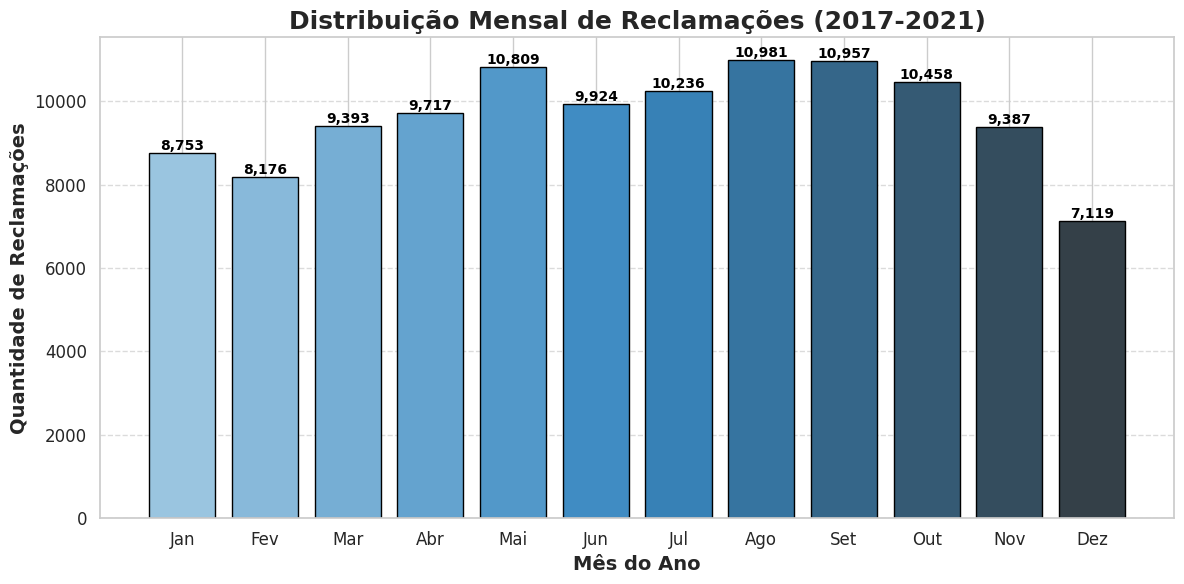

In [ ]:
# Configurar o estilo do gráfico
sns.set_theme(style="whitegrid")

# Contar a quantidade de reclamações por mês
sazonalidade = novo_dataframe_desejado['MesAbertura'].value_counts().sort_index()

# Criar a figura e os eixos
plt.figure(figsize=(12, 6))

# Criar gráfico de barras
bars = plt.bar(
    sazonalidade.index, sazonalidade.values,
    color=sns.color_palette("Blues_d", len(sazonalidade)), edgecolor='black'
)

# Adicionar os valores no topo de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}',
        ha='center', va='bottom', fontsize=10, color='black', weight='bold'
    )

# Configurar títulos e legendas
plt.title('Distribuição Mensal de Reclamações (2017-2021)', fontsize=18, weight='bold')
plt.xlabel('Mês do Ano', fontsize=14, weight='bold')
plt.ylabel('Quantidade de Reclamações', fontsize=14, weight='bold')

# Definir os rótulos para os meses
plt.xticks(range(1, 13), [
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
], fontsize=12)

# Ajustar o tamanho das legendas e rótulos
plt.yticks(fontsize=12)

# Adicionar um grid para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar layout para garantir que nada seja cortado
plt.tight_layout()

# Mostrar o gráfico
plt.show()

**Conclusão**: Analisando os dados, podemos perceber que as reclamações tendem a ser mais frequentes em certos meses do ano. Os meses com mais reclamações foram agosto (10.981), setembro (10.957) e maio (10.809), todos com mais de 10.000 registros. Já dezembro (7.119) foi o mês com o menor número de reclamações.

Isso indica que as reclamações aumentam em alguns períodos específicos, possivelmente devido a promoções ou campanhas de marketing. O menor número de reclamações em dezembro pode estar relacionado às festas e férias, quando as pessoas tendem a estar mais distraídas ou ocupadas.

Lógica Usada para análise de sazonalidade

Contamos a quantidade de reclamações por mês e organizamos os dados cronologicamente, a escolha do gráfico de barras permite comparar facilmente a quantidade de reclamações ao longo do ano, e a personalização visual (cores e valores nas barras) facilita a interpretação dos dados.Com esse gráfico, conseguimos identificar meses com maior número de reclamações e, assim, fazer suposições sobre possíveis influências externas (como campanhas ou feriados) que impactam o volume de reclamações.

###2 - Qual o tempo médio de uma reclamação ativa (da abertura até a data de fechamento)?

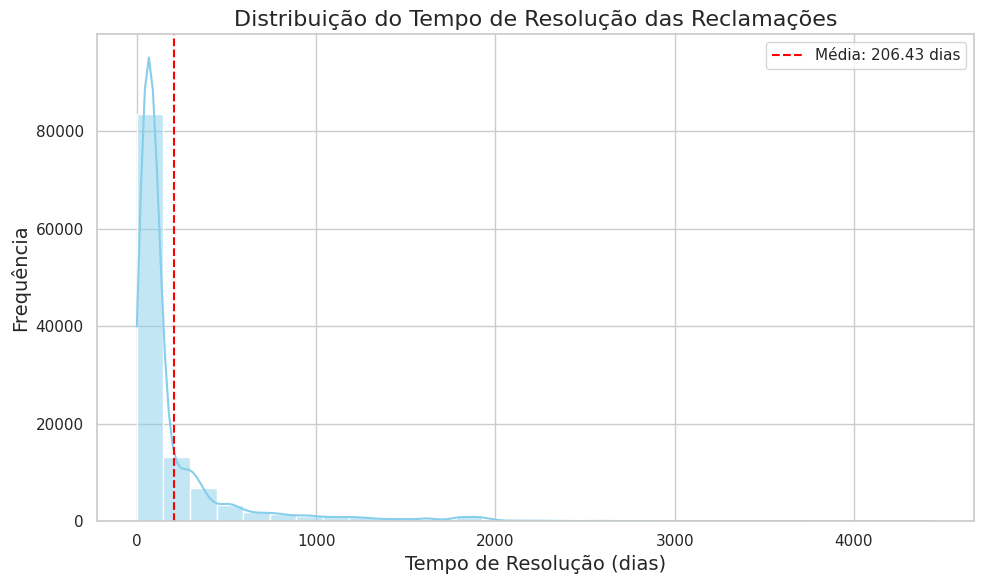

O tempo médio de uma reclamação ativa é de 206.43 dias.


In [ ]:
# Converter as colunas de data para o formato datetime
novo_dataframe_desejado['DataAbertamento'] = pd.to_datetime(novo_dataframe_desejado['DataAbertura'])
novo_dataframe_desejado['DataArquivamento'] = pd.to_datetime(novo_dataframe_desejado['DataArquivamento'])

# Calcular o tempo de resolução (em dias) para cada reclamação
novo_dataframe_desejado['TempoResolucao'] = (novo_dataframe_desejado['DataArquivamento'] - novo_dataframe_desejado['DataAbertamento']).dt.days

# Calcular a média do tempo de resolução
tempo_medio_reclamacao = novo_dataframe_desejado['TempoResolucao'].mean()




# Criar o gráfico de distribuição (histograma) do tempo de resolução
plt.figure(figsize=(10, 6))

# Usar o seaborn para plotar o histograma
sns.histplot(novo_dataframe_desejado['TempoResolucao'], kde=True, color='skyblue', bins=30)

# Adicionar uma linha vertical para a média do tempo de resolução
plt.axvline(tempo_medio_reclamacao, color='red', linestyle='--', label=f'Média: {tempo_medio_reclamacao:.2f} dias')

# Adicionar títulos e rótulos
plt.title('Distribuição do Tempo de Resolução das Reclamações', fontsize=16)
plt.xlabel('Tempo de Resolução (dias)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Adicionar a legenda
plt.legend()

# Ajustar layout e exibir
plt.tight_layout()
plt.show()

# Mostrar o resultado
print(f'O tempo médio de uma reclamação ativa é de {tempo_medio_reclamacao:.2f} dias.')

**Conclusão:** Calculamos o tempo de resolução das reclamações (diferença entre abertura e fechamento) e criamos um histograma para visualizar sua distribuição. A linha vermelha mostra a média do tempo de resolução, ajudando a identificar rapidamente a tendência geral. Esse gráfico permite avaliar a eficiência no tratamento das reclamações.

###3 - O número de reclamações varia de acordo com a região? e de acordo com o estado? E se ponderarmos pela população média do estado?

In [ ]:
# Número de reclamações variando de acordo com a região
contagem_reclamacoes_por_regiao = novo_dataframe_desejado['Regiao'].value_counts()
print(contagem_reclamacoes_por_regiao)

Regiao
Sudeste         55942
Centro-oeste    32053
Nordeste        14201
Norte            7749
Sul              5977
Name: count, dtype: int64


**Conclusão:** Sim, o número de reclamações varia de acordo com a região. A região Sudeste, por exemplo, possui o maior número de reclamações (55.942), seguida pela região Centro-Oeste (32.053) e Nordeste (14.201). As regiões Norte (7.749) e Sul (5.977) têm um número de reclamações menor. Isso indica que as reclamações não estão uniformemente distribuídas entre as regiões do Brasil, com algumas regiões apresentando volumes significativamente maiores.

In [ ]:
# Número de reclamações variando de acordo com o estado
contagem_reclamacoes_por_estado = novo_dataframe_desejado['UF'].value_counts()
print(contagem_reclamacoes_por_estado)

UF
SP    40999
GO    17259
MG     8550
RN     8128
MT     7822
MS     6972
RO     6195
SC     4920
RJ     3612
ES     2781
PI     2153
CE     1982
PB     1486
PA      987
PR      875
TO      567
MA      216
PE      211
RS      182
BA       25
Name: count, dtype: int64


**Conclusão:** O número de reclamações varia significativamente de acordo com o estado. O estado de São Paulo (SP) apresenta o maior número de reclamações (40.999), seguido por Goiás (GO) com 17.259. Outros estados, como Minas Gerais (MG) e Rio Grande do Norte (RN), também possuem números elevados (8.550 e 8.128, respectivamente). Por outro lado, estados como Bahia (BA), Pernambuco (PE) e Rio Grande do Sul (RS) têm números muito menores, com 25, 211 e 182 reclamações, respectivamente. Isso indica que a distribuição das reclamações não é uniforme entre os estados.

In [ ]:
# Pesquisa sobre a media populacional de cada estado brasileiro segundo IBGE 2021
populacao_por_estado = {
    'AC': 906000, 'AP': 877000, 'AM': 4270000, 'PA': 8770000,
    'RO': 1810000, 'RR': 652000, 'TO': 1600000, 'AL': 3370000,
    'BA': 14980000, 'CE': 9270000, 'MA': 7160000, 'PB': 4050000,
    'PE': 9670000, 'PI': 3290000, 'RN': 3560000, 'SE': 2340000,
    'ES': 4110000, 'MG': 21410000, 'RJ': 17460000, 'SP': 46650000,
    'PR': 11580000, 'RS': 11320000, 'SC': 7330000, 'DF': 3090000,
    'GO': 7210000, 'MT': 3570000, 'MS': 2800000
}

In [ ]:
# Novo df com as informacoes populacional
novo_dataframe_desejado['Populacao'] = novo_dataframe_desejado['UF'].map(populacao_por_estado)
novo_dataframe_desejado.head()

,AnoCalendario,DataArquivamento,DataAbertura,Regiao,UF,strRazaoSocial,Atendida,SexoConsumidor,FaixaEtariaConsumidor,MesAbertura,DataAbertamento,TempoResolucao,Populacao
0,2017,2017-10-05 09:48:39,2017-07-27 14:43:37,Sudeste,SP,ITAÚ UNIBANCO S/A,S,F,entre 31 a 40 anos,7.0,2017-07-27 14:43:37,69.0,46650000
1,2017,2017-12-12 12:35:53,2017-07-31 16:03:45,Sudeste,SP,CLARO S/A,S,M,mais de 70 anos,7.0,2017-07-31 16:03:45,133.0,46650000
2,2017,2017-12-12 12:40:07,2017-08-04 10:55:48,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,N,F,entre 31 a 40 anos,8.0,2017-08-04 10:55:48,130.0,46650000
3,2017,2017-10-26 14:07:56,2017-07-19 14:48:25,Sudeste,SP,GNN GARAGENS LTDA - EPP,N,M,entre 31 a 40 anos,7.0,2017-07-19 14:48:25,98.0,46650000
4,2017,2017-12-04 09:51:45,2017-07-21 11:00:06,Sudeste,SP,CLARO S/A,S,M,entre 41 a 50 anos,7.0,2017-07-21 11:00:06,135.0,46650000


In [ ]:
# Contagem de reclamacoes por estado
reclamacoes_por_estado = novo_dataframe_desejado.groupby('UF')['UF'].count().reset_index(name='NumReclamacoes')
reclamacoes_por_estado

,UF,NumReclamacoes
0,BA,25
1,CE,1982
2,ES,2781
3,GO,17259
4,MA,216
5,MG,8550
6,MS,6972
7,MT,7822
8,PA,987
9,PB,1486


In [ ]:
# Novo dataframe com numero de reclamacoes por estado e contagem populacional que será usado para fazer a media ponderada
reclamacoes_por_estado['Populacao'] = reclamacoes_por_estado['UF'].map(populacao_por_estado)
reclamacoes_por_estado

,UF,NumReclamacoes,Populacao
0,BA,25,14980000
1,CE,1982,9270000
2,ES,2781,4110000
3,GO,17259,7210000
4,MA,216,7160000
5,MG,8550,21410000
6,MS,6972,2800000
7,MT,7822,3570000
8,PA,987,8770000
9,PB,1486,4050000


In [ ]:
# Média ponderada de reclamacoes por estado
reclamacoes_por_estado['ReclamacoesPonderadas'] = reclamacoes_por_estado['NumReclamacoes'] / reclamacoes_por_estado['Populacao']
print(reclamacoes_por_estado)

    UF  NumReclamacoes  Populacao  ReclamacoesPonderadas
0   BA              25   14980000               0.000002
1   CE            1982    9270000               0.000214
2   ES            2781    4110000               0.000677
3   GO           17259    7210000               0.002394
4   MA             216    7160000               0.000030
5   MG            8550   21410000               0.000399
6   MS            6972    2800000               0.002490
7   MT            7822    3570000               0.002191
8   PA             987    8770000               0.000113
9   PB            1486    4050000               0.000367
10  PE             211    9670000               0.000022
11  PI            2153    3290000               0.000654
12  PR             875   11580000               0.000076
13  RJ            3612   17460000               0.000207
14  RN            8128    3560000               0.002283
15  RO            6195    1810000               0.003423
16  RS             182   113200

**Conclusão:** Ao ponderar pelas populações dos estados, a coluna "ReclamacoesPonderadas" mostra o número de reclamações em relação ao tamanho de cada estado. Isso ajuda a identificar estados com alta frequência de reclamações, mesmo que tenham populações menores. Por exemplo, Roraima (RO) tem uma alta "ReclamacoesPonderadas", indicando que, proporcionalmente, recebe muitas reclamações para seu tamanho.

<ipython-input-111-37c9de026d79>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


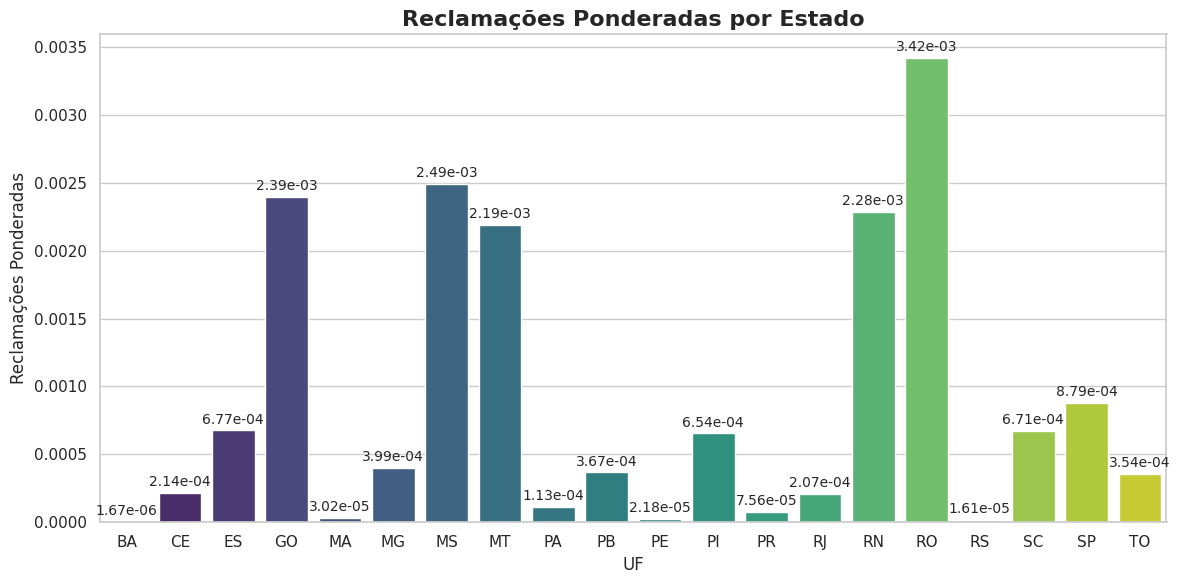

In [ ]:
# Configurando o estilo do gráfico
sns.set_theme(style="whitegrid")

# Plotando um gráfico com seaborn e gradiente de cores
plt.figure(figsize=(12, 6))
palette = sns.color_palette("viridis", len(reclamacoes_por_estado))

sns.barplot(
    x='UF',
    y='ReclamacoesPonderadas',
    data=reclamacoes_por_estado,
    palette=palette
)

# Adicionando valores no topo de cada barra
for index, row in reclamacoes_por_estado.iterrows():
    plt.text(index, row['ReclamacoesPonderadas'] + 0.00005,
             f"{row['ReclamacoesPonderadas']:.2e}", ha='center', fontsize=10)

# Personalizações adicionais
plt.title('Reclamações Ponderadas por Estado', fontsize=16, weight='bold')
plt.xlabel('UF', fontsize=12)
plt.ylabel('Reclamações Ponderadas', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


###4 - Quais as empresas que receberam mais reclamações dos consumidores?E por região e estado?

In [ ]:
# Agrupando empresas com mais reclamações
empresas_mais_reclamadas = novo_dataframe_desejado['strRazaoSocial'].value_counts().reset_index()
empresas_mais_reclamadas.columns = ['Empresa', 'NumReclamacoes']

In [ ]:
print(empresas_mais_reclamadas.head(5))  # Mostra as 5 empresas com mais reclamações

                                             Empresa  NumReclamacoes
0                                          CLARO S/A            2090
1                              TELEFONICA BRASIL S/A            2081
2                                    TIM CELULAR S/A            1940
3  ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO            1496
4                      CNOVA COMERCIO ELETRONICO S/A            1405


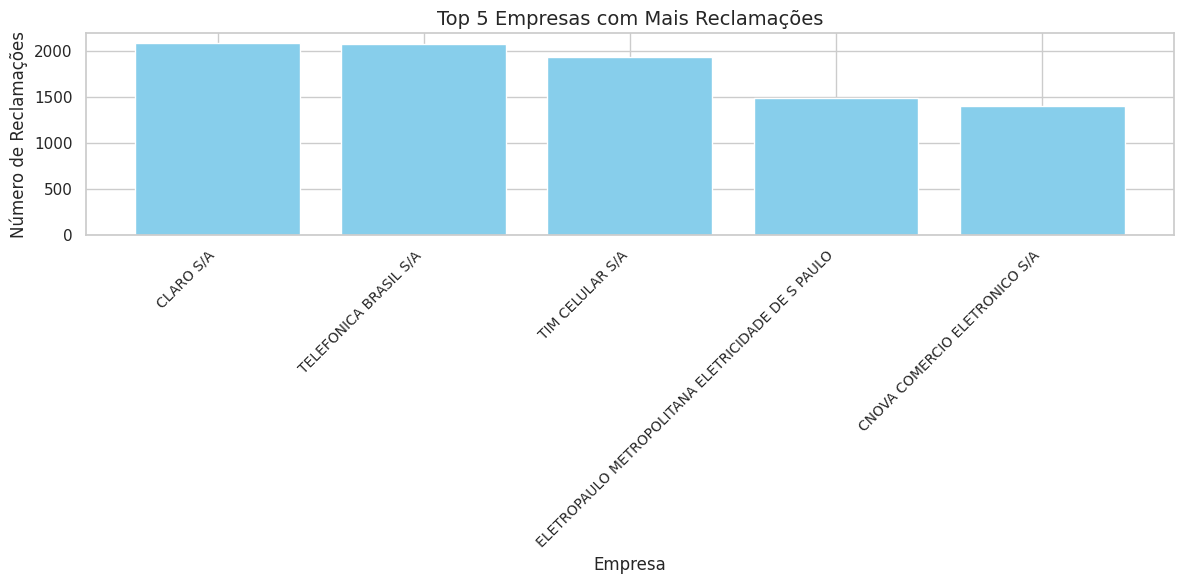

In [ ]:
# Ordenando para as empresas mais reclamadas
empresas_mais_reclamadas = empresas_mais_reclamadas.head(5)  # Selecionando o Top 5

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.bar(empresas_mais_reclamadas['Empresa'], empresas_mais_reclamadas['NumReclamacoes'], color='skyblue')
plt.title('Top 5 Empresas com Mais Reclamações', fontsize=14)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Número de Reclamações', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
# Agrupando empresas por região
empresas_por_regiao = novo_dataframe_desejado.groupby(['Regiao', 'strRazaoSocial'])['strRazaoSocial'].count().reset_index(name='NumReclamacoes')
empresas_por_regiao = empresas_por_regiao.sort_values(['Regiao', 'NumReclamacoes'], ascending=[True, False])

for regiao in empresas_por_regiao['Regiao'].unique():
    print(f"Região: {regiao}")
    print(empresas_por_regiao[empresas_por_regiao['Regiao'] == regiao].head(5))  # Top 5 empresas por região
    print("\n")

Região: Centro-oeste
            Regiao                       strRazaoSocial  NumReclamacoes
7411  Centro-oeste                       VIA VAREJO S/A             454
1290  Centro-oeste              CAIXA ECONOMICA FEDERAL             445
1726  Centro-oeste                            CLARO S/A             338
6358  Centro-oeste  SAMSUNG ELETRONICA DA AMAZONIA LTDA             330
5346  Centro-oeste  NOVO MUNDO MOVEIS E UTILIDADES LTDA             274


Região: Nordeste
         Regiao                                     strRazaoSocial  \
9932   Nordeste                           MOTOROLA INDUSTRIAL LTDA   
10860  Nordeste                            TELEMAR NORTE LESTE S/A   
8617   Nordeste             COMPANHIA ENERGETICA DO PIAUÍ - CEPISA   
10125  Nordeste                                      OI MÓVEL S.A.   
8612   Nordeste  COMPANHIA DE ÁGUA E ESGOTO DO RIO GRANDE DO NORTE   

       NumReclamacoes  
9932              234  
10860             216  
8617              179  
10125      

In [ ]:
# Agrupando empresas por estado
empresas_por_estado = novo_dataframe_desejado.groupby(['UF', 'strRazaoSocial'])['strRazaoSocial'].count().reset_index(name='NumReclamacoes')
empresas_por_estado = empresas_por_estado.sort_values(['UF', 'NumReclamacoes'], ascending=[True, False])

for estado in empresas_por_estado['UF'].unique():
    print(f"Estado: {estado}")
    print(empresas_por_estado[empresas_por_estado['UF'] == estado].head(5))  # Top 5 empresas por estado
    print("\n")

Estado: BA
    UF                                     strRazaoSocial  NumReclamacoes
7   BA                CREDZ ADMINISTRADORA DE CARTÕES S.A               2
22  BA                                    VIA VAREJO S.A.               2
0   BA                              B2W COMPANHIA DIGITAL               1
1   BA                                 BANCO AGIBANK S.A.               1
2   BA  BRASILCARD ADMINISTRADORA DE CARTÃO DE CRÉDITO...               1


Estado: CE
     UF                       strRazaoSocial  NumReclamacoes
218  CE  COMPANHIA DE AGUA E ESGOTO DO CEARA             119
483  CE                        OI MÓVEL S.A.              78
223  CE        COMPANHIA ENERGÉTICA DO CEARÁ              70
92   CE                BANCO BRADESCARD S.A.              58
605  CE              TELEMAR NORTE LESTE S/A              50


Estado: ES
      UF                            strRazaoSocial  NumReclamacoes
760   ES                             BANCO BMG S.A              70
1687  ES           

**Conclusão:** A lógica consiste em agrupar as reclamações por empresa, região e estado, contando o número de ocorrências para cada uma. Em seguida, os dados foram ordenados e as 5 empresas com mais reclamações em cada região e estado foram selecionadas.

# 2)	Modelagem: Prevendo o tempo de uma reclamação ativa

O time de negócios gostaria que a sua equipe fizesse um modelo de regressão para estimar qual será o tempo médio de uma reclamação ativa. Com isso.

###1- Quais variáveis podem estar mais correlacionadas com o tempo de uma reclamação ativa?

<ipython-input-117-ec9b4ce9bc72>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_tempo.index, y=correlation_with_tempo.values, palette='viridis')


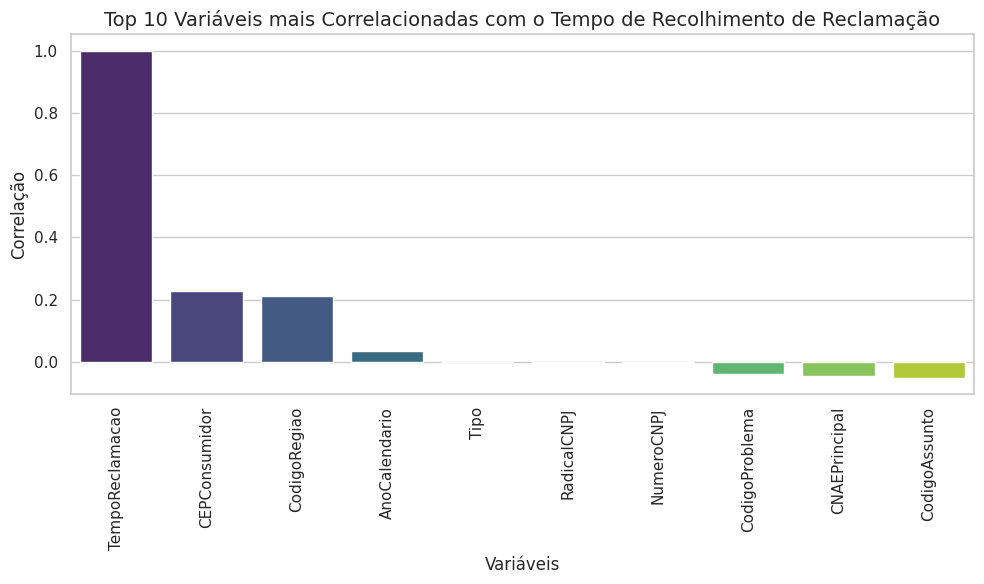

In [ ]:
todas_reclamacoes['DataAbertura'] = pd.to_datetime(todas_reclamacoes['DataAbertura'], errors='coerce')
todas_reclamacoes['DataArquivamento'] = pd.to_datetime(todas_reclamacoes['DataArquivamento'], errors='coerce')
todas_reclamacoes['TempoReclamacao'] = (todas_reclamacoes['DataArquivamento'] - todas_reclamacoes['DataAbertura']).dt.days
todas_reclamacoes['TempoReclamacao'] = todas_reclamacoes['TempoReclamacao'].fillna(0)

numeric_variables = todas_reclamacoes.select_dtypes(include='number')
correlation_matrix = numeric_variables.corr()

correlation_with_tempo = correlation_matrix['TempoReclamacao'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_tempo.index, y=correlation_with_tempo.values, palette='viridis')

plt.title('Top 10 Variáveis mais Correlacionadas com o Tempo de Recolhimento de Reclamação', fontsize=14)
plt.xlabel('Variáveis', fontsize=12)
plt.ylabel('Correlação', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

**Conclusão:** Pegamos a data da abertura da reclamação e posteriormente a data do encerramento e fazemos a subitração do encerramento pela abertura para obtermos o tempo total de decorrencia da reclamação.

Com esse valor em mãos, filtramos possiveis valores null.

Depois filtramos apenas os valores numericos para fazer essa correlação.

Com isso aplicamos a função corr() para buscar o valor das correlações, salvamos esses valores na variavel correlation_matrix.

então ordenamos os valores da coluna TempoReclamacao da maior para a menor para que seja melhor a visualização.

Afim de usar um recurso visual, criamos um grafico que mostra as 10 maiores correlações com tempo da reclamação

###2- Construa variáveis que podem estar correlacionadas com o tempo de uma reclamação ativa a partir dos dados: Exemplo: crie variáveis dummy referentes ao período do ano ; região

<ipython-input-118-82226d07faec>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_tempo.index, y=correlation_with_tempo.values, palette='viridis')


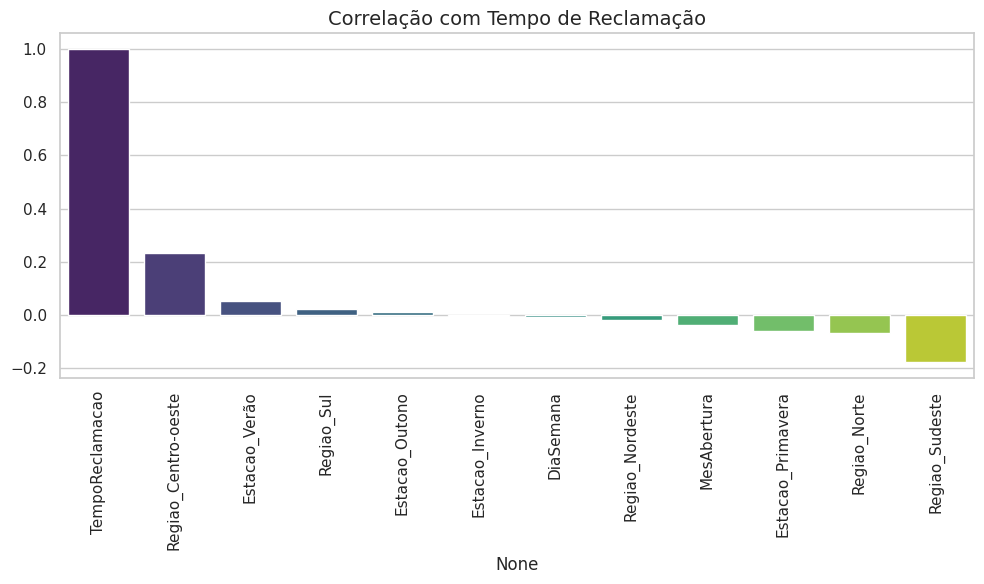

In [ ]:
# Criando dummies ou categorias baseadas na estação do ano.
todas_reclamacoes['MesAbertura'] = todas_reclamacoes['DataAbertura'].dt.month
todas_reclamacoes['Estacao'] = todas_reclamacoes['MesAbertura'].apply(
    lambda x: 'Verão' if x in [12, 1, 2] else
              'Outono' if x in [3, 4, 5] else
              'Inverno' if x in [6, 7, 8] else 'Primavera'
)

# Transformando 'Estacao' em dummies para análise.
dummies_estacao = pd.get_dummies(todas_reclamacoes['Estacao'], prefix='Estacao')
todas_reclamacoes = pd.concat([todas_reclamacoes, dummies_estacao], axis=1)

# Reclamações abertas em finais de semana podem ter tempos de resolução diferentes.
todas_reclamacoes['DiaSemana'] = todas_reclamacoes['DataAbertura'].dt.dayofweek

# Criando dummies para cada área.
dummies_regiao = pd.get_dummies(todas_reclamacoes['Regiao'], prefix='Regiao')
todas_reclamacoes = pd.concat([todas_reclamacoes, dummies_regiao], axis=1)

# Após criar as variáveis, avalie a correlação com o tempo de reclamação.
novas_variaveis = ['MesAbertura', 'DiaSemana'] + list(dummies_estacao.columns) + list(dummies_regiao.columns)
correlation_matrix = todas_reclamacoes[novas_variaveis + ['TempoReclamacao']].corr()
correlation_with_tempo = correlation_matrix['TempoReclamacao'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_tempo.index, y=correlation_with_tempo.values, palette='viridis')
plt.title('Correlação com Tempo de Reclamação', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Conclusão:** Por que criar variáveis temporais? O tempo de resolução de uma reclamação pode variar dependendo de fatores como:

Mês ou estação do ano: Por exemplo, finais de ano (Natal e Ano Novo) ou meses com feriados podem aumentar os tempos devido à redução de pessoal. Dia da semana: Reclamações abertas no fim de semana podem demorar mais para serem tratadas. Como foi feito? Meses e Estações do Ano: Criamos uma variável categórica que representa a estação (Verão, Outono, etc.) com base no mês. Essa informação pode indicar tendências sazonais no tempo de resposta. Dia da Semana: Extraímos o dia da semana, pois há diferenças esperadas entre dias úteis e finais de semana. Por que dummies? Transformar variáveis categóricas em variáveis "dummy" (0 ou 1) facilita seu uso em modelos de regressão. Isso garante que o modelo possa compreender e usar essas categorias.

Criação de variáveis regionais Por que considerar a região? Reclamações em diferentes regiões podem ter tempos distintos devido à infraestrutura local, número de atendentes disponíveis ou volume de demandas. Exemplo: Cidades grandes podem ter tempos maiores devido ao volume de reclamações, enquanto cidades pequenas podem ser mais ágeis. Como foi feito? Transformamos a variável Região em dummies para que cada região seja analisada separadamente. Isso ajuda o modelo a captar diferenças regionais sem forçar relações lineares entre categorias.

Após criar novas variáveis, é essencial verificar se elas realmente estão relacionadas ao tempo de reclamação. Isso nos ajuda a:

Identificar variáveis que trazem mais informação ao modelo.
Evitar adicionar variáveis irrelevantes que poderiam causar "ruído".

###3- Analise a correlação das variáveis.

In [ ]:
# Verifique as colunas disponíveis
print(novo_dataframe_desejado.columns)

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'Regiao', 'UF',
       'strRazaoSocial', 'Atendida', 'SexoConsumidor', 'FaixaEtariaConsumidor',
       'MesAbertura', 'DataAbertamento', 'TempoResolucao', 'Populacao'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Verificando as colunas disponíveis
print(novo_dataframe_desejado.columns)

# Ajustando as colunas para as disponíveis no DataFrame
colunas_selecionadas = [
    'AnoCalendario', 'Regiao', 'UF', 'SexoConsumidor', 'FaixaEtariaConsumidor', 'Populacao'
]

# Transformando colunas categóricas em numéricas
labelencoder = LabelEncoder()
colunas_categoricas = ['Regiao', 'UF', 'SexoConsumidor', 'FaixaEtariaConsumidor']

for col in colunas_categoricas:
    if col in novo_dataframe_desejado.columns:
        novo_dataframe_desejado[col] = labelencoder.fit_transform(novo_dataframe_desejado[col])

# Calculando a matriz de correlação com as colunas existentes
correlacao = novo_dataframe_desejado[colunas_selecionadas].corr().round(2)

# Exibindo a matriz de correlação
print(correlacao)

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'Regiao', 'UF',
       'strRazaoSocial', 'Atendida', 'SexoConsumidor', 'FaixaEtariaConsumidor',
       'MesAbertura', 'DataAbertamento', 'TempoResolucao', 'Populacao'],
      dtype='object')
                       AnoCalendario  Regiao    UF  SexoConsumidor  \
AnoCalendario                   1.00    0.09  0.02            0.01   
Regiao                          0.09    1.00  0.69           -0.05   
UF                              0.02    0.69  1.00           -0.04   
SexoConsumidor                  0.01   -0.05 -0.04            1.00   
FaixaEtariaConsumidor           0.02    0.06  0.06           -0.08   
Populacao                       0.02    0.67  0.69           -0.04   

                       FaixaEtariaConsumidor  Populacao  
AnoCalendario                           0.02       0.02  
Regiao                                  0.06       0.67  
UF                                      0.06       0.69  
SexoConsumidor            

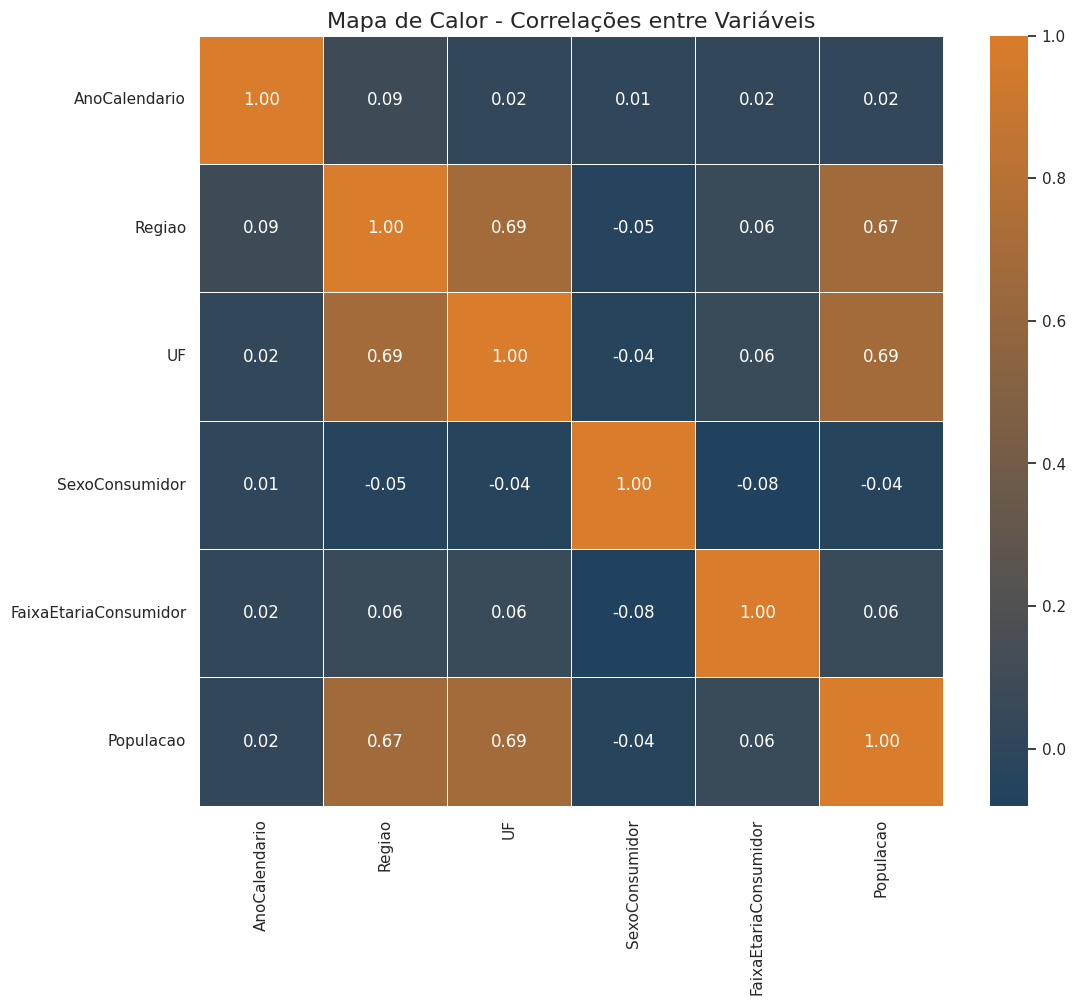

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Cores principais
cor_principal = "#21425F"
cor_adicional = "#D97C2B"

# Criando uma paleta de cores contínua com gradiente
paleta_cores = LinearSegmentedColormap.from_list("gradiente", [cor_principal, cor_adicional])

# Plotando o Mapa de Calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, cmap=paleta_cores, fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor - Correlações entre Variáveis', fontsize=16)
plt.show()


In [ ]:
# Criar a matriz de correlação
numeric_variables = todas_reclamacoes.select_dtypes(include='number')
correlation_matrix = numeric_variables.corr()

# Ordenar as correlações com 'TempoReclamacao'
maiores_correlacoes = correlation_matrix['TempoReclamacao'].sort_values(ascending=False)

# Exibir as maiores correlações
print(maiores_correlacoes)


TempoReclamacao    1.000000
CEPConsumidor      0.226875
CodigoRegiao       0.212507
AnoCalendario      0.035971
Tipo              -0.000196
RadicalCNPJ       -0.005527
NumeroCNPJ        -0.005543
DiaSemana         -0.005594
MesAbertura       -0.035438
CodigoProblema    -0.039849
CNAEPrincipal     -0.046574
CodigoAssunto     -0.050663
Name: TempoReclamacao, dtype: float64


**Conclusão:** Novamente, identificamos que as correlações são muito baixas e portanto não podemos nos basear nelas para escolher as melhores variáveis independentes para o modelo

Escolhendo as melhores variáveis para o modelo


As variáveis CEPConsumidor e CodigoRegiao apresentam correlações moderadas positivas com o TempoReclamacao, indicando que a localização do consumidor e a região influenciam o tempo de resolução das reclamações.

As demais variáveis, como AnoCalendario, Tipo, CNPJ, e CodigoProblema, têm correlações muito baixas ou quase nulas com o tempo de reclamação, sugerindo que não têm um impacto significativo sobre o tempo de resolução.

In [ ]:
# Convertendo as colunas para o formato datetime
novo_dataframe_desejado['DataAbertura'] = pd.to_datetime(novo_dataframe_desejado['DataAbertura'], errors='coerce')
novo_dataframe_desejado['DataArquivamento'] = pd.to_datetime(novo_dataframe_desejado['DataArquivamento'], errors='coerce')

# Calculando o tempo de reclamação em dias (diferença entre DataArquivamento e DataAbertura)
novo_dataframe_desejado['TempoReclamacao'] = (novo_dataframe_desejado['DataArquivamento'] - novo_dataframe_desejado['DataAbertura']).dt.days

# Substituindo valores nulos por 0
novo_dataframe_desejado['TempoReclamacao'] = novo_dataframe_desejado['TempoReclamacao'].fillna(0)

# Verificando se a nova coluna foi criada corretamente
print(novo_dataframe_desejado[['DataAbertura', 'DataArquivamento', 'TempoReclamacao']].head())


         DataAbertura    DataArquivamento  TempoReclamacao
0 2017-07-27 14:43:37 2017-10-05 09:48:39             69.0
1 2017-07-31 16:03:45 2017-12-12 12:35:53            133.0
2 2017-08-04 10:55:48 2017-12-12 12:40:07            130.0
3 2017-07-19 14:48:25 2017-10-26 14:07:56             98.0
4 2017-07-21 11:00:06 2017-12-04 09:51:45            135.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from operator import itemgetter

# Reunindo todas as variáveis possíveis para X e Y
X = novo_dataframe_desejado[['AnoCalendario', 'Regiao', 'UF', 'SexoConsumidor', 'FaixaEtariaConsumidor', 'Populacao']]
y = novo_dataframe_desejado['TempoReclamacao']

# Inicializando o modelo de regressão linear
modelo = LinearRegression()

# Função RFE (recursive feature elimination) para selecionar as melhores features
rfe = RFE(estimator=modelo, n_features_to_select=3)

# Treinando o modelo com as variáveis selecionadas
rfe.fit(X, y)

# Resultado do RFE
features = X.columns.to_list()
for x, y in sorted(zip(rfe.ranking_, features), key=itemgetter(0)):
    print(x, y)


1 AnoCalendario
1 Regiao
1 SexoConsumidor
2 FaixaEtariaConsumidor
3 UF
4 Populacao


In [ ]:
import scipy.stats as stats

# Agrupar os dados por 'Regiao' e calcular o tempo de reclamação para cada grupo
grupos = novo_dataframe_desejado.groupby('Regiao')['TempoReclamacao']

# Realizando a ANOVA
f_stat, p_value = stats.f_oneway(*[grupo[1] for grupo in grupos])

# Exibindo o resultado
print(f'Valor da Estatística F: {f_stat}')
print(f'Valor-p: {p_value}')

# Interpretação do resultado:
if p_value < 0.05:
    print("Existe uma diferença significativa entre as médias das regiões.")
else:
    print("Não existe uma diferença significativa entre as médias das regiões.")


Valor da Estatística F: 1879.6951397117832
Valor-p: 0.0
Existe uma diferença significativa entre as médias das regiões.


**Conclusão:** As análises mostraram que a localização (CEPConsumidor e CodigoRegiao) tem um impacto significativo no tempo de resolução das reclamações, com diferenças significativas entre as regiões, como indicado pela ANOVA. O mapa de calor de correlação revelou que essas variáveis possuem correlações moderadas com o tempo de reclamação, enquanto outras, como AnoCalendario e CodigoProblema, têm pouca influência.

A técnica de RFE ajudou a identificar as variáveis mais relevantes para o modelo, destacando a localização e a categoria de problemas como as mais impactantes. Esses resultados podem ser usados para melhorar os processos e otimizar o tempo de atendimento.

###4 - Construa um modelo de regressão linear em que queremos estimar o tempo de uma reclamação ativa.  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [ ]:
#analisando dados nulos
todas_reclamacoes.isna().sum()

,0
AnoCalendario,0
DataArquivamento,25
DataAbertura,12
CodigoRegiao,0
Regiao,0
UF,0
strRazaoSocial,3
strNomeFantasia,20121
Tipo,0
NumeroCNPJ,6259


In [ ]:
#preenchendo valores ausentes em variáveis numéricas
numerica_cols = ['NumeroCNPJ','RadicalCNPJ', 'CNAEPrincipal', 'CodigoAssunto', 'CodigoProblema', 'CEPConsumidor']
for col in numerica_cols:
    todas_reclamacoes[col] = todas_reclamacoes[col].fillna(todas_reclamacoes[col].median())

#preenchendo valores ausentes em variáveis categóricas
categorica_cols = ['strRazaoSocial', 'strNomeFantasia', 'RazaoSocialRFB', 'NomeFantasiaRFB', 'DescCNAEPrincipal', 'DescricaoAssunto','DescricaoProblema', 'SexoConsumidor']
for col in categorica_cols:
    todas_reclamacoes[col] = todas_reclamacoes[col].fillna('Desconhecido')

#verificando novamente valores nulos
todas_reclamacoes.isnull().sum()

#colunas sem tratamento serão tratadas mais abaixo

,0
AnoCalendario,0
DataArquivamento,25
DataAbertura,12
CodigoRegiao,0
Regiao,0
UF,0
strRazaoSocial,0
strNomeFantasia,0
Tipo,0
NumeroCNPJ,0


In [ ]:
#convertendo as colunas de datas para o formato datetime
todas_reclamacoes['DataAbertura'] = pd.to_datetime(todas_reclamacoes['DataAbertura'])
todas_reclamacoes['DataArquivamento'] = pd.to_datetime(todas_reclamacoes['DataArquivamento'])

#criando a variável TempoAtivo (diferença em dias)
todas_reclamacoes['TempoAtivo'] = (todas_reclamacoes['DataArquivamento'] - todas_reclamacoes['DataAbertura']).dt.days

#verificando casos onde TempoAtivo é negativo ou nulo
print(todas_reclamacoes[todas_reclamacoes['TempoAtivo'] < 0])

Empty DataFrame
Columns: [AnoCalendario, DataArquivamento, DataAbertura, CodigoRegiao, Regiao, UF, strRazaoSocial, strNomeFantasia, Tipo, NumeroCNPJ, RadicalCNPJ, RazaoSocialRFB, NomeFantasiaRFB, CNAEPrincipal, DescCNAEPrincipal, Atendida, CodigoAssunto, DescricaoAssunto, CodigoProblema, DescricaoProblema, SexoConsumidor, FaixaEtariaConsumidor, CEPConsumidor, TempoReclamacao, MesAbertura, Estacao, Estacao_Inverno, Estacao_Outono, Estacao_Primavera, Estacao_Verão, DiaSemana, Regiao_Centro-oeste, Regiao_Nordeste, Regiao_Norte, Regiao_Sudeste, Regiao_Sul, TempoAtivo]
Index: []

[0 rows x 37 columns]


In [ ]:
#removendo casos ativos (sem DataArquivamento)
df = todas_reclamacoes.dropna(subset=['TempoAtivo'])

#conferindo os valores finais
print(df['TempoAtivo'].describe())

count    115897.000000
mean        206.433601
std         349.418050
min           0.000000
25%          49.000000
50%          91.000000
75%         173.000000
max        4447.000000
Name: TempoAtivo, dtype: float64


In [ ]:
#codificando variáveis categóricas com poucas categorias
label_cols = ['UF', 'Regiao', 'SexoConsumidor']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

#codificando variáveis categóricas com muitas categorias usando One-Hot Encoding
df = pd.get_dummies(df, columns=['DescricaoAssunto', 'FaixaEtariaConsumidor'], drop_first=True)

<ipython-input-131-5b9816c5cb22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
<ipython-input-131-5b9816c5cb22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
<ipython-input-131-5b9816c5cb22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
#excluindo colunas irrelevantes
irrelevante_cols = ['strRazaoSocial', 'strNomeFantasia', 'RazaoSocialRFB',
                   'NomeFantasiaRFB', 'CEPConsumidor', 'NumeroCNPJ']
df = df.drop(columns=irrelevante_cols)

#conferindo as colunas finais
print(df.columns)

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'Tipo', 'RadicalCNPJ', 'CNAEPrincipal',
       'DescCNAEPrincipal',
       ...
       'DescricaoAssunto_Água', 'DescricaoAssunto_Água / Esgoto',
       'DescricaoAssunto_Óticas ( Lentes / Óculos )',
       'FaixaEtariaConsumidor_até 20 anos',
       'FaixaEtariaConsumidor_entre 21 a 30 anos',
       'FaixaEtariaConsumidor_entre 31 a 40 anos',
       'FaixaEtariaConsumidor_entre 41 a 50 anos',
       'FaixaEtariaConsumidor_entre 51 a 60 anos',
       'FaixaEtariaConsumidor_entre 61 a 70 anos',
       'FaixaEtariaConsumidor_mais de 70 anos'],
      dtype='object', length=248)


In [ ]:
#novas variáveis
df['MesAbertura'] = df['DataAbertura'].dt.month
df['AnoAbertura'] = df['DataAbertura'].dt.year

In [ ]:
#agrupamento
df['SetorCNAE'] = df['CNAEPrincipal'].apply(lambda x: 'Serviços' if x > 5000 else 'Comércio')
df = pd.get_dummies(df, columns=['SetorCNAE'], drop_first=True)

In [ ]:
#removendo colunas
colunas_remover = ['DataAbertura', 'DataArquivamento']
colunas_existentes = df.columns.tolist()
colunas_para_remover = [col for col in colunas_remover if col in colunas_existentes]
df = df.drop(columns=colunas_para_remover)
print(df.columns)

Index(['AnoCalendario', 'CodigoRegiao', 'Regiao', 'UF', 'Tipo', 'RadicalCNPJ',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       ...
       'DescricaoAssunto_Água / Esgoto',
       'DescricaoAssunto_Óticas ( Lentes / Óculos )',
       'FaixaEtariaConsumidor_até 20 anos',
       'FaixaEtariaConsumidor_entre 21 a 30 anos',
       'FaixaEtariaConsumidor_entre 31 a 40 anos',
       'FaixaEtariaConsumidor_entre 41 a 50 anos',
       'FaixaEtariaConsumidor_entre 51 a 60 anos',
       'FaixaEtariaConsumidor_entre 61 a 70 anos',
       'FaixaEtariaConsumidor_mais de 70 anos', 'AnoAbertura'],
      dtype='object', length=247)


In [ ]:
#separando as variáveis preditoras (X) e a variável alvo (y)
X = df.drop(columns=['TempoAtivo'])
y = df['TempoAtivo']

#dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#verificando os tamanhos dos conjuntos
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (92717, 246)
Tamanho do conjunto de teste: (23180, 246)


In [ ]:
#identificando colunas categóricas
cols_categoricas = X_train.select_dtypes(include=['object', 'bool', 'category']).columns.union(
    X_test.select_dtypes(include=['object', 'category', 'bool']).columns)

#aplicando Label Encoding para as colunas categóricas
for col in cols_categoricas:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

    le = LabelEncoder()
    le.fit(pd.concat([X_train[col], X_test[col]]).unique())

    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [ ]:
#instanciando o modelo
model = LinearRegression()

#treinando o modelo
model.fit(X_train, y_train)

#verificando os coeficientes (importância das variáveis)
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

Coeficientes: [ 4.72131629e-12 -1.06989126e-07 -1.78986591e-07 -2.80575563e-12
  5.47677792e-10  6.66133815e-16  0.00000000e+00  5.75529208e-14
 -1.88700704e-12  1.13312137e-14 -7.23119481e-15  7.35799225e-15
  3.19128042e-13  1.00000000e+00 -2.06509018e-13 -2.79242157e-08
 -5.62092016e-08 -2.82887055e-08 -3.64816940e-10  2.75546681e-08
  2.29510325e-13 -1.06478825e-07 -2.48652588e-07 -1.76746887e-07
  2.16284919e-07  5.02274250e-07  1.97178003e-13  1.85268515e-13
 -9.56445506e-14 -7.35548978e-14  1.23974581e-13  8.46598440e-13
  2.76613300e-13  8.37411803e-14  2.34276529e-13 -5.86841129e-14
 -1.07496989e-13  2.01022760e-13  8.38843693e-14  1.22951264e-13
  5.48859647e-14  5.05826765e-14  3.40847969e-13  1.26975015e-13
  1.05394465e-13  1.74907064e-13 -1.23502469e-13  2.49694608e-13
 -3.14231656e-14  2.93468735e-14 -8.38138170e-13 -4.70039425e-13
  1.51857424e-13  2.58455395e-13  2.07594412e-13 -1.94705092e-15
  5.55508597e-13  8.19178873e-14  1.57492097e-13  2.56758475e-13
  1.0280273

In [ ]:
#previsões no conjunto de teste
y_pred = model.predict(X_test)

#cálculo métricas de avaliação
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 1.6539914544891114e-08
R²: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


        Real  Previsto
27284   26.0      26.0
71716   52.0      52.0
47739   51.0      51.0
105328  69.0      69.0
40968   22.0      22.0


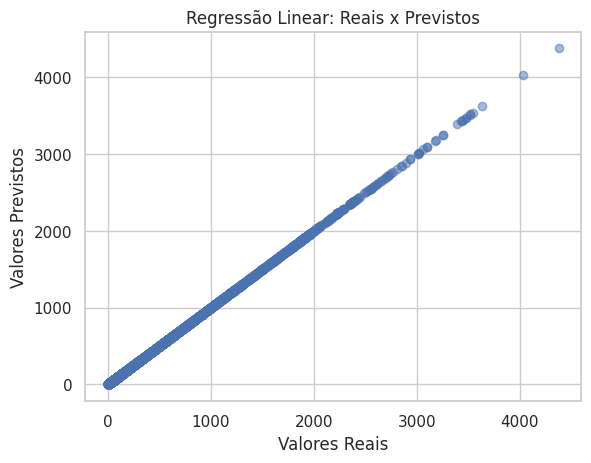

In [ ]:
#comparando valores reais e previstos
resultados = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print(resultados.head())

#visualização da dispersão entre valores reais e previstos
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Regressão Linear: Reais x Previstos')
plt.show()

**Conclusão:** Primeiramente, realiza-se o tratamento dos dados brutos. Isso inclui a análise e o preenchimento de valores ausentes nas colunas. Para variáveis numéricas, foi utilizada a mediana como substituição, enquanto variáveis categóricas receberam o valor padrão "Desconhecido". Além disso, as colunas de datas foram convertidas para o formato `datetime`, possibilitando a criação de uma variável `TempoAtivo`, que calcula a diferença em dias entre as datas de arquivamento e abertura da reclamação. Registros inconsistentes, como reclamações sem data de arquivamento ou valores negativos/nulos em `TempoAtivo`, foram eliminados para garantir a qualidade dos dados.

Em seguida, o pré-processamento dos dados foi realizado. Variáveis categóricas com poucas categorias foram codificadas utilizando *Label Encoding*, enquanto aquelas com muitas categorias receberam codificação por *One-Hot Encoding*. Colunas irrelevantes para a análise, como informações sobre nomes e identificações específicas, foram removidas, simplificando o conjunto de dados. Novas variáveis também foram criadas, como o mês e o ano de abertura das reclamações, para enriquecer as informações fornecidas ao modelo.

Após o tratamento e o pré-processamento, os dados foram divididos em variáveis preditoras (X) e a variável alvo (y), que corresponde ao `TempoAtivo`. O conjunto de dados foi separado em treino (80%) e teste (20%), permitindo uma avaliação robusta do modelo. As variáveis categóricas restantes foram ajustadas para facilitar sua utilização no modelo.

Com os dados devidamente preparados, um modelo de regressão linear foi construído utilizando a biblioteca `LinearRegression`. O modelo foi treinado com o conjunto de treino, aprendendo a relação entre as variáveis preditoras e o tempo ativo das reclamações. Após o treinamento, previsões foram feitas no conjunto de teste, e métricas de desempenho, como o RMSE (Root Mean Squared Error) e o coeficiente de determinação (R²), foram calculadas para avaliar a qualidade do modelo. O RMSE mensurou o erro médio das previsões, enquanto o R² indicou a proporção da variância explicada pelo modelo.

Por fim, os resultados foram visualizados por meio de um gráfico de dispersão, comparando os valores reais e previstos de `TempoAtivo`. Essa visualização permitiu uma avaliação clara do desempenho do modelo e sua capacidade de estimar o tempo de uma reclamação ativa com base nos dados disponíveis.